In [4]:
import os
import sys
from aicsimageio import AICSImage
import numpy as np
import pandas as pd
from importlib import reload

import skimage
from skimage.feature import blob_log

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display, Image

# local imports
import file_io
import preprocessor
import cell_detector
import animate_funcs

In [5]:
"""
Information CZI Dimension Characters:
- '0': 'Sample',  # e.g. RGBA
- 'X': 'Width',
- 'Y': 'Height',
- 'C': 'Channel',
- 'Z': 'Slice',  # depth
- 'T': 'Time',
- 'R': 'Rotation',
- 'S': 'Scene',  # contiguous regions of interest in a mosaic image
- 'I': 'Illumination',  # direction
- 'B': 'Block',  # acquisition
- 'M': 'Mosaic',  # index of tile for compositing a scene
- 'H': 'Phase',  # e.g. Airy detector fibers
- 'V': 'View',  # e.g. for SPIM
"""

"\nInformation CZI Dimension Characters:\n- '0': 'Sample',  # e.g. RGBA\n- 'X': 'Width',\n- 'Y': 'Height',\n- 'C': 'Channel',\n- 'Z': 'Slice',  # depth\n- 'T': 'Time',\n- 'R': 'Rotation',\n- 'S': 'Scene',  # contiguous regions of interest in a mosaic image\n- 'I': 'Illumination',  # direction\n- 'B': 'Block',  # acquisition\n- 'M': 'Mosaic',  # index of tile for compositing a scene\n- 'H': 'Phase',  # e.g. Airy detector fibers\n- 'V': 'View',  # e.g. for SPIM\n"

# Data Loading
 Load data from `.czi` file format into convient `numpy` arrays.


In [20]:
reload(file_io)

# test image
TEST_PATH = "../../Data/test/3x3-extract-Scene6-07-14to15.czi"

# czi file loader
czi = file_io.CZILoader(TEST_PATH)

# cleaned scene
czi.restructure_scene(scene=0)
scene0 = czi.scene

print(scene0.shape)

(49, 9, 472, 640, 4)


(-0.5, 639.5, 471.5, -0.5)

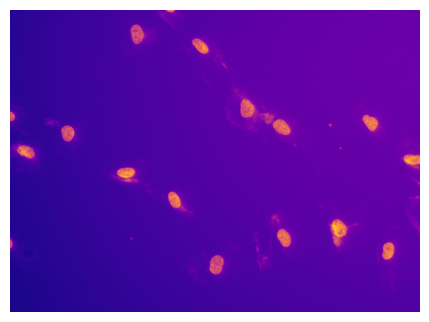

In [7]:
"""
plot an example to make sure we're sane
"""

matplotlib.rcParams['figure.dpi'] = 100
TIME = 0
CHANNEL = 2 # blue channel
TILE = 8

test = scene0[TIME, TILE, :, :, CHANNEL]
plt.imshow(test, cmap='plasma')
plt.axis(False)


# Preprocessing

A few functions to clean up individual images.

(-0.5, 639.5, 471.5, -0.5)

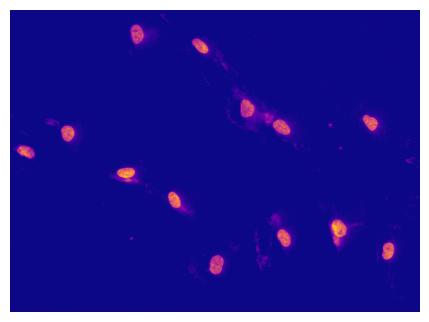

In [8]:
reload(preprocessor)

test_processed = preprocessor.ImageProcessor(test).transform()

plt.imshow(test_processed, cmap='plasma')
plt.axis(False)

# Single Tile Saving

A test on saving a single tile in OME .tiff format after processing

In [62]:
reload(file_io)

TILE = 0
CHANNEL = 2

# cheap processing
processed_scene = scene0.copy()

for i in range(49):
    processed_scene[i, TILE, :, :, CHANNEL] = preprocessor.ImageProcessor(processed_scene[i, TILE, :, :, CHANNEL]).transform()


# save the results to ome.tiff format
ome = file_io.OME_writer(processed_scene, tile=0)
ome.restructure_scene()

ome.write("../../Data/test/test.ome.tiff")


saved: ../../Data/test/test.ome.tiff


# Simple Animation 
A few simple tools to create vizualizations from scenes.

In [9]:
# """
# simple animation: save to gif.
# """

# reload(animate_funcs)

# outpath = "../../Figures/test.gif"

# # create viz
# animate_funcs.simple_giffer(scene=scene0, 
#                             tile=0, 
#                             channel=2, 
#                             outpath=outpath, 
#                             fps=20)

# # display viz
# Image(outpath)

In [10]:
# """
# simple animation for Jupyter onnly
# """

# reload(animate_funcs)

# # create viz
# animate_funcs.jupyterlab_video(scene=scene0, 
#                             tile=0, 
#                             channel=2)



# Cell Detection

13

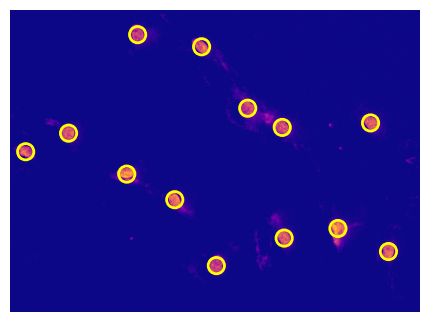

In [11]:
reload(cell_detector)

# detect some cells and plot
detector = cell_detector.CellDetector(test_processed)
detector.get_cells(set_attr=True)
detector.plot_cells()

len(detector.cells)

# Handling Mosaics

Reconstructing the full field of view

In [60]:
reload(file_io)

blocker = file_io.SceneBlocker(scene0)
blocked_scene = blocker.block()
blocked_scene.shape

(49, 1416, 1920, 4)

(-0.5, 1919.5, 1415.5, -0.5)

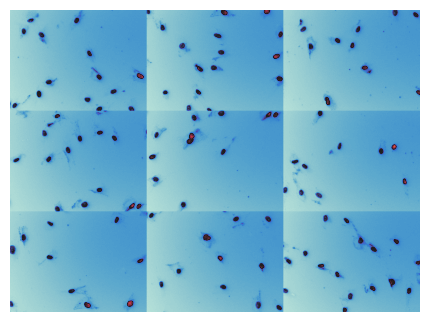

In [62]:
TIME = 1
CHANNEL = 2

img = blocked_scene[TIME, :, :, CHANNEL]

plt.imshow(img, cmap="icefire")
plt.axis(False)

In [69]:
# reload(animate_funcs)

# outpath = "../../Figures/test_plate.gif"

# # create viz
# animate_funcs.whole_plate_giffer(blocked_scene=blocked_scene, channel=2, 
#                                  outpath=outpath, 
#                                  fps=20)

# # display viz
# Image(outpath)